In [23]:
import numpy as np
import tensorflow as tf
import h5py
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.applications.imagenet_utils import preprocess_input

# Loading Dataset

In [24]:
def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 
    
    #list of classes
    
    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [25]:
X_train,y_train,X_test,y_test,classes = load_dataset()

This picture is of class : [5]


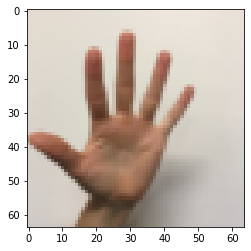

In [30]:
#example
plt.imshow(X_train[3].reshape(64,64,3))
print("This picture is of class :",y_train.T[3])

In [9]:
def convert_to_one_hot(Y, C):
    'This function convert the prediction layer into list of classes'
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [10]:
X_train = X_train/255.
X_test = X_test/255.
y_train = convert_to_one_hot(y_train,6).T
y_test = convert_to_one_hot(y_test,6).T
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 12288)
Y_train shape: (1080, 6)
X_test shape: (120, 12288)
Y_test shape: (120, 6)


# Model 

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(6,activation='softmax'))

In [12]:
model.compile(optimizer = tf.keras.optimizers.Adam(),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [13]:
model.fit(epochs = 100 , x=X_train , y=y_train)

Epoch 1/100
34/34 [==============================] - 1s 16ms/step - loss: 2.4521 - accuracy: 0.1806
Epoch 2/100
34/34 [==============================] - 1s 16ms/step - loss: 1.8860 - accuracy: 0.2287
Epoch 3/100
34/34 [==============================] - 1s 16ms/step - loss: 1.6913 - accuracy: 0.3028
Epoch 4/100
34/34 [==============================] - 1s 18ms/step - loss: 1.5445 - accuracy: 0.3352
Epoch 5/100
34/34 [==============================] - 1s 17ms/step - loss: 1.4722 - accuracy: 0.4009
Epoch 6/100
34/34 [==============================] - 1s 16ms/step - loss: 1.4186 - accuracy: 0.4370
Epoch 7/100
34/34 [==============================] - 1s 17ms/step - loss: 1.2795 - accuracy: 0.4926
Epoch 8/100
34/34 [==============================] - 1s 17ms/step - loss: 1.2346 - accuracy: 0.5130
Epoch 9/100
34/34 [==============================] - 1s 16ms/step - loss: 1.1145 - accuracy: 0.5639
Epoch 10/100
34/34 [==============================] - 1s 16ms/step - loss: 1.1373 - accuracy: 0.5491

In [15]:
preds = model.evaluate(X_test,y_test)
print("Loss:",preds[0])
print("Accuracy of test set:",preds[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.8833
Loss: 0.35139694809913635
Accuracy of test set: 0.8833333253860474


[[0. 1. 0. 0. 0. 0.]]


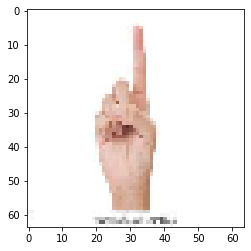

In [16]:
img_path = 'my_image_finger1.jpg'

img = image.load_img(img_path, target_size=(64, 64))
imshow(img)
x = image.img_to_array(img)
x=x.reshape(1,64*64*3)
print(model.predict(x))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               3145984   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 774       
Total params: 3,261,958
Trainable params: 3,261,958
Non-trainable params: 0
_________________________________________________________________
